In [1]:
import torch

print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Laptop GPU


In [6]:
# CELL 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
# CELL 2: Load the CSV
data_path = r"E:\ML\Projects\WaterPollutionProject\Dataset\waterQuality1.csv"
df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset shape: 7999 rows, 21 columns


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [9]:
# CELL 3: Basic info & missing values
print("=== Data types & non-null counts ===")
print(df.info())

print("\n=== Missing values per column ===")
print(df.isnull().sum())

=== Data types & non-null counts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver     

In [12]:
# CELL 4: Descriptive statistics
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [13]:
# CELL 5: Look for the target column (WQI or similar)
print("\n=== Columns with few unique values (possible categorical/target) ===")
for col in df.columns:
    if df[col].nunique() < 20:
        print(f"{col}: {sorted(df[col].unique())}")


=== Columns with few unique values (possible categorical/target) ===
mercury: [np.float64(0.0), np.float64(0.001), np.float64(0.002), np.float64(0.003), np.float64(0.004), np.float64(0.005), np.float64(0.006), np.float64(0.007), np.float64(0.008), np.float64(0.009), np.float64(0.01)]
selenium: [np.float64(0.0), np.float64(0.01), np.float64(0.02), np.float64(0.03), np.float64(0.04), np.float64(0.05), np.float64(0.06), np.float64(0.07), np.float64(0.08), np.float64(0.09), np.float64(0.1)]
uranium: [np.float64(0.0), np.float64(0.01), np.float64(0.02), np.float64(0.03), np.float64(0.04), np.float64(0.05), np.float64(0.06), np.float64(0.07), np.float64(0.08), np.float64(0.09)]
is_safe: ['#NUM!', '0', '1']


In [14]:
# CELL 6: Inspect the target column
print("=== Target column: is_safe ===")
print(df['is_safe'].value_counts())
print("\nUnique values:", df['is_safe'].unique())

=== Target column: is_safe ===
is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

Unique values: ['1' '0' '#NUM!']


In [15]:
# CELL 7: Inspect ammonia (object) column
print("\n=== Ammonia column sample ===")
print(df['ammonia'].head(10))
print("\nUnique non-numeric values in ammonia:")
print(df['ammonia'][~df['ammonia'].str.replace('.', '', 1).str.replace('-', '', 1).str.isnumeric()].unique())


=== Ammonia column sample ===
0     9.08
1    21.16
2    14.02
3    11.33
4    24.33
5    14.47
6      5.6
7    19.87
8    24.58
9    16.76
Name: ammonia, dtype: object

Unique non-numeric values in ammonia:
['#NUM!']


In [16]:
# CELL 8: Count total corrupted rows
corrupted_ammonia = df['ammonia'] == '#NUM!'
corrupted_target = df['is_safe'] == '#NUM!'

print(f"Rows with '#NUM!' in ammonia: {corrupted_ammonia.sum()}")
print(f"Rows with '#NUM!' in is_safe: {corrupted_target.sum()}")
print(f"Overlap (same row): {(corrupted_ammonia & corrupted_target).sum()}")

Rows with '#NUM!' in ammonia: 3
Rows with '#NUM!' in is_safe: 3
Overlap (same row): 3


In [17]:
# CELL 9: Remove rows with '#NUM!'
print(f"Original rows: {df.shape[0]}")
df_clean = df[(df['ammonia'] != '#NUM!') & (df['is_safe'] != '#NUM!')].copy()
print(f"After removing #NUM!: {df_clean.shape[0]} rows")

Original rows: 7999
After removing #NUM!: 7996 rows


In [18]:
# CELL 10: Convert types
df_clean['ammonia'] = pd.to_numeric(df_clean['ammonia'], errors='coerce')
df_clean['is_safe'] = df_clean['is_safe'].astype(int)

print("Data types fixed:")
print(df_clean[['ammonia', 'is_safe']].dtypes)

Data types fixed:
ammonia    float64
is_safe      int64
dtype: object


In [19]:
# CELL 11: Define features and target
X = df_clean.drop('is_safe', axis=1)  # All except target
y = df_clean['is_safe']

print(f"Features: {X.shape[1]} columns")
print(f"Target distribution:\n{y.value_counts(normalize=True)}")

Features: 20 columns
Target distribution:
is_safe
0    0.885943
1    0.114057
Name: proportion, dtype: float64


In [20]:
# CELL 12: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]} samples")
print(f"Test:  {X_test.shape[0]} samples")

Train: 6396 samples
Test:  1600 samples


In [21]:
# CELL 13: Scale features (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled (mean ~0, std ~1)")

Features scaled (mean ~0, std ~1)


In [22]:
# CELL 14: Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# CELL 15: Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

print(f"Train tensor: {X_train_tensor.shape}")
print(f"Test tensor:  {X_test_tensor.shape}")
# CELL 16: Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("DataLoaders ready")# CELL 17: Define MLP Model
class WaterQualityMLP(nn.Module):
    def __init__(self, input_size=20):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Binary output
        )
    
    def forward(self, x):
        return self.network(x)

model = WaterQualityMLP()
print(model)

Train tensor: torch.Size([6396, 20])
Test tensor:  torch.Size([1600, 20])
DataLoaders ready
WaterQualityMLP(
  (network): Sequential(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [23]:
# CELL 18: Loss & Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("Loss: BCE, Optimizer: Adam")

Loss: BCE, Optimizer: Adam


In [24]:
# CELL 19: Training Loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

epochs = 50
print(f"Training on: {device}")

for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:2d} | Loss: {train_loss/len(train_loader):.4f}")

Training on: cuda
Epoch  1 | Loss: 0.3311
Epoch 10 | Loss: 0.1562
Epoch 20 | Loss: 0.1215
Epoch 30 | Loss: 0.1113
Epoch 40 | Loss: 0.0959
Epoch 50 | Loss: 0.0880


In [25]:
# CELL 20: Evaluation on Test Set
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred_proba = model(X_test_tensor).cpu().numpy()
    y_pred = (y_pred_proba >= 0.5).astype(int)
    y_true = y_test.values.reshape(-1, 1)

print("Predictions ready")

Predictions ready


In [26]:
# CELL 21: Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\n[[TN, FP]")
print(" [FN, TP]]")

Accuracy: 0.9563
F1-Score: 0.7812

Confusion Matrix:
[[1405   13]
 [  57  125]]

[[TN, FP]
 [FN, TP]]


In [27]:
# CELL 22: Classification Report
print("\nDetailed Report:")
print(classification_report(y_true, y_pred, target_names=['Unsafe (0)', 'Safe (1)']))


Detailed Report:
              precision    recall  f1-score   support

  Unsafe (0)       0.96      0.99      0.98      1418
    Safe (1)       0.91      0.69      0.78       182

    accuracy                           0.96      1600
   macro avg       0.93      0.84      0.88      1600
weighted avg       0.95      0.96      0.95      1600



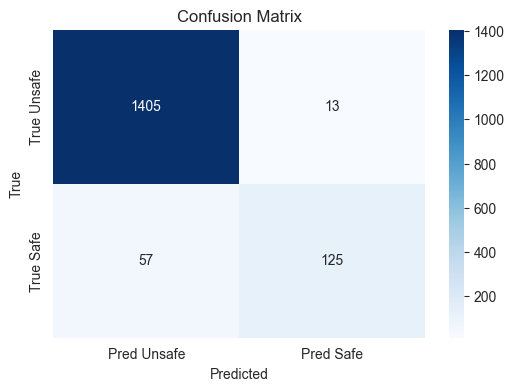

In [28]:
# CELL 23: Plot Training Loss Curve (optional)
import matplotlib.pyplot as plt

# Re-run training with loss tracking if needed, or use stored values
# For now, just show final metrics visually
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred Unsafe', 'Pred Safe'],
            yticklabels=['True Unsafe', 'True Safe'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# CELL 24: Save the trained model and scaler
import joblib
import os

# Create model directory
os.makedirs("model", exist_ok=True)

# Save PyTorch model
torch.save(model.state_dict(), "model/water_mlp.pth")

# Save scaler
joblib.dump(scaler, "model/scaler.pkl")

print("Model and scaler saved to ./model/")

Model and scaler saved to ./model/


In [30]:
# CELL 25: Create Streamlit app file
app_code = '''
import streamlit as st
import torch
import torch.nn as nn
import joblib
import numpy as np
import pandas as pd

# --- Model Definition ---
class WaterQualityMLP(nn.Module):
    def __init__(self, input_size=20):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(64, 32), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(32, 1), nn.Sigmoid()
        )
    def forward(self, x): return self.network(x)

# --- Load Model & Scaler ---
@st.cache_resource
def load_model():
    model = WaterQualityMLP()
    model.load_state_dict(torch.load("model/water_mlp.pth", map_location='cpu'))
    model.eval()
    scaler = joblib.load("model/scaler.pkl")
    return model, scaler

model, scaler = load_model()

# --- App UI ---
st.title("Water Safety Predictor")
st.write("Enter water quality parameters to predict if it's **SAFE** to drink.")

cols = [
    'aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium',
    'chloramine', 'chromium', 'copper', 'flouride', 'bacteria',
    'viruses', 'lead', 'nitrates', 'nitrites', 'mercury',
    'perchlorate', 'radium', 'selenium', 'silver', 'uranium'
]

inputs = {}
for col in cols:
    val = st.number_input(col.capitalize(), min_value=0.0, value=0.0, step=0.01, format="%.4f")
    inputs[col] = val

if st.button("Predict Safety"):
    # Prepare input
    input_df = pd.DataFrame([inputs])
    input_scaled = scaler.transform(input_df)
    input_tensor = torch.FloatTensor(input_scaled)
    
    # Predict
    with torch.no_grad():
        prob = model(input_tensor).item()
    
    label = "SAFE" if prob >= 0.5 else "UNSAFE"
    color = "green" if label == "SAFE" else "red"
    
    st.markdown(f"### Prediction: <span style='color:{color}'>{label}</span>", unsafe_allow_html=True)
    st.write(f"Confidence: {prob:.1%}")
'''
# Save to file
with open("app.py", "w") as f:
    f.write(app_code)
print("Streamlit app saved as 'app.py'")

Streamlit app saved as 'app.py'


In [31]:
# CELL 26: Instructions to Run App
print("STREAMLIT APP READY!")
print("="*50)
print("1. Open Anaconda Prompt or Terminal")
print("2. Navigate to your project folder:")
print("   cd E:\\ML\\Projects\\WaterPollutionProject")
print("3. Run the app:")
print("   streamlit run app.py")
print("="*50)
print("App will open in your browser!")
print("Enter sensor values → Get instant SAFE/UNSAFE prediction")

STREAMLIT APP READY!
1. Open Anaconda Prompt or Terminal
2. Navigate to your project folder:
   cd E:\ML\Projects\WaterPollutionProject
3. Run the app:
   streamlit run app.py
App will open in your browser!
Enter sensor values → Get instant SAFE/UNSAFE prediction
